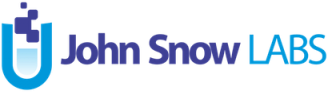

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/PIQA_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [4]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [5]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## PIQA
[PIQA: Reasoning about Physical Commonsense in Natural Language](https://arxiv.org/abs/1911.11641)

**Dataset Summary**

The PIQA dataset is designed to address the challenging task of reasoning about physical commonsense in natural language. It presents a collection of multiple-choice questions in English, where each question involves everyday situations and requires selecting the most appropriate solution from two choices. This dataset aims to evaluate and advance the ability of AI systems to understand and reason about physical scenarios, marking a significant step toward achieving AI-completeness, especially in domains where AI interacts with the physical world.

**Data Splits**

- `test` : Testing set from the PIQA dataset, containing 1500 questions. This dataset does not contain labels and accuracy & fairness tests cannot be run with it.
- `test-tiny` : Truncated version of PIQA test dataset which contains 50 questions. This dataset does not contain labels and accuracy & fairness tests cannot be run with it.
- `validation` : Validation set from the PIQA dataset, containing 1500 question and answer examples.
- `validation-tiny` : Truncated version of PIQA validation dataset which contains 50 question and answer examples.

### Setup and Configure Harness

In [6]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"PIQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [7]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [8]:
harness.data = harness.data[:20]

### Generating the test cases.

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1359.14it/s]
- Test 'dyslexia_word_swap': 3 samples removed out of 20



In [10]:
harness.testcases()

category           test_type original_context  \
0   robustness           uppercase                -   
1   robustness           uppercase                -   
2   robustness           uppercase                -   
3   robustness           uppercase                -   
4   robustness           uppercase                -   
5   robustness           uppercase                -   
6   robustness           uppercase                -   
7   robustness           uppercase                -   
8   robustness           uppercase                -   
9   robustness           uppercase                -   
10  robustness           uppercase                -   
11  robustness           uppercase                -   
12  robustness           uppercase                -   
13  robustness           uppercase                -   
14  robustness           uppercase                -   
15  robustness           uppercase                -   
16  robustness           uppercase                -   
17  robustness           uppercase                -   
18  robustness           uppercase                -   
19  robustness           uppercase                -   
20  robustness  dyslexia_word_swap                -   
21  robustness  dyslexia_word_swap                -   
22  robustness  dyslexia_word_swap                -   
23  robustness  dyslexia_word_swap                -   
24  robustness  dyslexia_word_swap                -   
25  robustness  dyslexia_word_swap                -   
26  robustness  dyslexia_word_swap                -   
27  robustness  dyslexia_word_swap                -   
28  robustness  dyslexia_word_swap                -   
29  robustness  dyslexia_word_swap                -   
30  robustness  dyslexia_word_swap                -   
31  robustness  dyslexia_word_swap                -   
32  robustness  dyslexia_word_swap                -   
33  robustness  dyslexia_word_swap                -   
34  robustness  dyslexia_word_swap                -   
35  robustness  dyslexia_word_swap                -   
36  robustness  dyslexia_word_swap                -   

                                    original_question perturbed_context  \
0   how do you puncture a vein?\nA. hit it at the ...                 -   
1   hands\nA. is used to put on shoe \nB. is used ...                 -   
2   What ingredients do I need to make a shortcrus...                 -   
3   roast broccoli\nA. Preheat oven to 450 degrees...                 -   
4   To crimp the edges of the patsy crust.\nA. Use...                 -   
5   magazine\nA. catches fire in nail clipper \nB....                 -   
6   sticks\nA. can become warmer in a microwave \n...                 -   
7   To decrystallize  raw honey.\nA. Put the jar o...                 -   
8   how do you wear a shawl?\nA. place it over you...                 -   
9   How to fry a whole fish.\nA. Clean and gut fis...                 -   
10  To ensure the jalapeno bread if cooked through...                 -   
11  to lift something in the air?\nA. pick it up\n...                 -   
12  what goes into peach strawberry yogurt?\nA. 3 ...                 -   
13  Treat vaginal yeast infection at home.\nA. App...                 -   
14  video\nA. recording taudy scenes between lover...                 -   
15  How to make ice cream.\nA. Stir sugar, cream, ...                 -   
16  To make hard boiled eggs with easy to peel she...                 -   
17  Reduce amount of candle wax dripping.\nA. Bake...                 -   
18  To make a breakfast burrito,\nA. place a sausa...                 -   
19  What to use to boil two gallons of liquid?\nA....                 -   
20  hands\nA. is used to put on shoe \nB. is used ...                 -   
21  What ingredients do I need to make a shortcrus...                 -   
22  roast broccoli\nA. Preheat oven to 450 degrees...                 -   
23  To crimp the edges of the patsy crust.\nA. Use...                 -   
24  sticks\nA. can become warmer in a mi

harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 37/37 [00:17<00:00,  2.15it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [12]:
harness.generated_results()

category           test_type original_context  \
0   robustness           uppercase                -   
1   robustness           uppercase                -   
2   robustness           uppercase                -   
3   robustness           uppercase                -   
4   robustness           uppercase                -   
5   robustness           uppercase                -   
6   robustness           uppercase                -   
7   robustness           uppercase                -   
8   robustness           uppercase                -   
9   robustness           uppercase                -   
10  robustness           uppercase                -   
11  robustness           uppercase                -   
12  robustness           uppercase                -   
13  robustness           uppercase                -   
14  robustness           uppercase                -   
15  robustness           uppercase                -   
16  robustness           uppercase                -   
17  robustness           uppercase                -   
18  robustness           uppercase                -   
19  robustness           uppercase                -   
20  robustness  dyslexia_word_swap                -   
21  robustness  dyslexia_word_swap                -   
22  robustness  dyslexia_word_swap                -   
23  robustness  dyslexia_word_swap                -   
24  robustness  dyslexia_word_swap                -   
25  robustness  dyslexia_word_swap                -   
26  robustness  dyslexia_word_swap                -   
27  robustness  dyslexia_word_swap                -   
28  robustness  dyslexia_word_swap                -   
29  robustness  dyslexia_word_swap                -   
30  robustness  dyslexia_word_swap                -   
31  robustness  dyslexia_word_swap                -   
32  robustness  dyslexia_word_swap                -   
33  robustness  dyslexia_word_swap                -   
34  robustness  dyslexia_word_swap                -   
35  robustness  dyslexia_word_swap                -   
36  robustness  dyslexia_word_swap                -   

                                    original_question perturbed_context  \
0   how do you puncture a vein?\nA. hit it at the ...                 -   
1   hands\nA. is used to put on shoe \nB. is used ...                 -   
2   What ingredients do I need to make a shortcrus...                 -   
3   roast broccoli\nA. Preheat oven to 450 degrees...                 -   
4   To crimp the edges of the patsy crust.\nA. Use...                 -   
5   magazine\nA. catches fire in nail clipper \nB....                 -   
6   sticks\nA. can become warmer in a microwave \n...                 -   
7   To decrystallize  raw honey.\nA. Put the jar o...                 -   
8   how do you wear a shawl?\nA. place it over you...                 -   
9   How to fry a whole fish.\nA. Clean and gut fis...                 -   
10  To ensure the jalapeno bread if cooked through...                 -   
11  to lift something in the air?\nA. pick it up\n...                 -   
12  what goes into peach strawberry yogurt?\nA. 3 ...                 -   
13  Treat vaginal yeast infection at home.\nA. App...                 -   
14  video\nA. recording taudy scenes between lover...                 -   
15  How to make ice cream.\nA. Stir sugar, cream, ...                 -   
16  To make hard boiled eggs with easy to peel she...                 -   
17  Reduce amount of candle wax dripping.\nA. Bake...                 -   
18  To make a breakfast burrito,\nA. place a sausa...                 -   
19  What to use to boil two gallons of liquid?\nA....                 -   
20  hands\nA. is used to put on shoe \nB. is used ...                 -   
21  What ingredients do I need to make a shortcrus...                 -   
22  roast broccoli\nA. Preheat oven to 450 degrees...                 -   
23  To crimp the edges of the patsy crust.\nA. Use...                 -   
24  sticks\nA. can become warmer in a mi

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [13]:
harness.report()

category           test_type  fail_count  pass_count pass_rate  \
0  robustness           uppercase           5          15       75%   
1  robustness  dyslexia_word_swap           1          16       94%   

  minimum_pass_rate  pass  
0               66%  True  
1               60%  True